# Notebook - TPs CUDA / CHPS08011

_FRANTZ Raphaël - 2020 / 2021 - Université de Reims Champagne-Ardenne_

## Conversion d'une Image en couleur vers Niveau de gris

Pour la lecture / écriture d'images, on utilisera la bibliothèque **stb_image**.

### Compilation

In [8]:
%%bash
nvcc -g grayscale.cu -o grayscale.exe

stb_image.h(4152): warning: variable "old_limit" was set but never used

stb_image.h(5038): warning: variable "idata_limit_old" was set but never used

stb_image.h(6778): warning: variable "out_size" was set but never used

stb_image.h(6779): warning: variable "delays_size" was set but never used

grayscale.cu: In function ‘float grayscaleCpu(int, int, unsigned char*, unsigned char*)’:
grayscale.cu:33:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
   33 |     ftime(&tav);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
grayscale.cu:33:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
   33 |     ftime(&tav);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
grayscale.cu:50:11: warning: ‘int ftime(timeb*)’ 

### Exécution

In [11]:
%%bash
./grayscale.exe

Image 687x888, 3 composantes
Temps CPU: 0.004
Temps GPU: 0.000


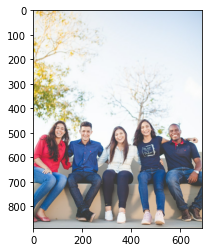

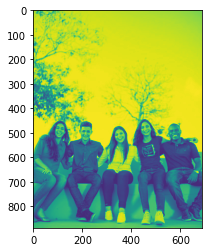

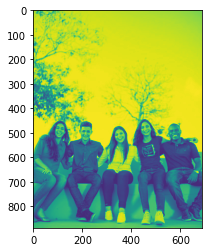

In [5]:
## Résultats

from matplotlib.pyplot import *

imshow(imread("data/test.tga"))
show()

imshow(imread("grayscaled_cpu.tga"))
show()

imshow(imread("grayscaled_gpu.tga"))
show()


## Floutage d'image

### Compilation

In [15]:
%%bash
nvcc -g blur_v3.cu -o blur_v3.exe

stb_image.h(4152): warning: variable "old_limit" was set but never used

stb_image.h(5038): warning: variable "idata_limit_old" was set but never used

stb_image.h(6778): warning: variable "out_size" was set but never used

stb_image.h(6779): warning: variable "delays_size" was set but never used



## Exécution

In [16]:
%%bash
./blur_v3.exe

Image 687x888, 3 composantes


## Résultats

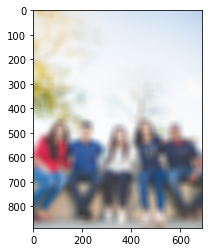

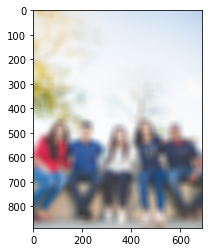

In [20]:
## Résultats

from matplotlib.pyplot import *

imshow(imread("generated/blurry_v2.tga"))
show()

imshow(imread("generated/blurry_v3.tga"))
show()

## Hypercube

In [23]:
%%bash
nvcc sum_v2.cu -o sum_v2.exe

sum_v2.cu: In function ‘int main(int, char**)’:
sum_v2.cu:173:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  173 |     ftime(&tav);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
sum_v2.cu:173:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  173 |     ftime(&tav);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
sum_v2.cu:175:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  175 |     ftime(&tap);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
sum_v2.cu:175:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  175 |     ftime(&tap);
 

In [24]:
%%bash
./sum_v2.exe

1000000 éléments, 7.629Mo
SequentielCPU: 999229, 0.002s
HypercubeCUDA: 999229, 0.001s


## Hypercube V2

Version optimisée en utilisant une mémoire partagée. On sépare le gros tableau en multiples sous-tableaux qu'on réduit de la même manière. Cette version n'est pas limitée en taille.

In [26]:
%%bash
nvcc sum_v3.cu -o sum_v3.exe

sum_v3.cu: In function ‘int main(int, char**)’:
sum_v3.cu:161:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  161 |     ftime(&tav);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
sum_v3.cu:161:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  161 |     ftime(&tav);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
sum_v3.cu:163:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  163 |     ftime(&tap);
      |           ^
/usr/include/x86_64-linux-gnu/sys/timeb.h:39:12: note: declared here
   39 | extern int ftime (struct timeb *__timebuf)
      |            ^~~~~
sum_v3.cu:163:11: warning: ‘int ftime(timeb*)’ is deprecated [-Wdeprecated-declarations]
  163 |     ftime(&tap);
 

In [28]:
%%bash
./sum_v3.exe

1000000 éléments, 7.629Mo
SequentielCPU: 999229, 0.002s
Réduction: stride=1
nbBlocks=977
Réduction: stride=1024
nbBlocks=1
HypercubeCUDA: 999229, 0.001s


## Conclusion

Même s'il est possible d'implémenter les algorithmes naïvement, une connaissance du fonctionnement interne des GPUs (nombre de threads maximum) et l'utilisation de la mémoire partagée permettent d'améliorer drastiquement les performances.